 ##              <font color = red size =15> Solution of Credit EDA Case Study </font>

## <font color = Green size = 5> Risk Analytics for **Consumer finance company**.</font>

<img src="credit_risk.jpg">

 ### <font color = blue size = 4> Business Objective : </font>
<font size = 4 > 
> -  Identifying the **Driving factors** for this risk Analytics. 
<br>    
<br>
> -  **Minimise the risk** of losing money while lending to customers. 
<br>
    <br>
<br>    
>-   Ensure that the consumers capable of repaying the loan are **Not rejected**. 
<br>
<br>    
</font>

<font size= 5 color = Orange>  Importing packages: </font>

In [135]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os
import random
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as font_manager

import seaborn as sns
sns.set_style('whitegrid')

<br>
<br>
<br>
<br>
<br>



1. <font size= 5 color = GoldRed> Data Import: </font>

In [3]:
#Using Pandas DF reading the Input csv file: 

#Loading this "application_data.csv" into app_data DF

app_data = pd.read_csv('application_data.csv')

#You can see the sample of the DataFrmae:
app_data.head


<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12      

<br>
<br>
<br>
<br>
<br>


2. <font size= 5 color = Red> Data Structure Validation:<font>

>  Checking the Structure of the Data

In [193]:
#Validating the application_data columns: 
print(app_data.info(max_cols=122))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to DAYS_EMPLOYED_PERCENT
dtypes: float64(66), int64(42), object(16)
memory usage: 290.9+ MB
None


In [6]:
#Application_data file statistics:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<font size = 5 color = Red>3. __Missing value Handling__ in Application Data:</font>

In [16]:
#Column wise Missing count: 
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [17]:
#Missing value columns:
missing_values=app_data.columns[app_data.isnull().any()]
missing_values

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [18]:
#Count of Missing values for those 67 columns in the sample dataset
app_data[missing_values].isnull().sum()

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

<font color =Gold size=5 >3.1  __Missing Values percentage__ </font>

In [147]:
#First Calculate the Missing Values percentage for columns which are applcable:
cols_miss_perc_nonrounded = app_data.columns[app_data.isna().any()]
cols_miss_perc = round(app_data[cols_miss_perc_nonrounded].isnull().sum()*100/app_data.shape[0],2)
cols_miss_perc

AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_

In [20]:
#More than 60_%_miss_cols missing:
more60_perc_miss_cols = cols_miss_perc[ cols_miss_perc > 60]
more60_perc_miss_cols

OWN_CAR_AGE                 65.99
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
FLOORSMIN_AVG               67.85
LIVINGAPARTMENTS_AVG        68.35
NONLIVINGAPARTMENTS_AVG     69.43
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
FLOORSMIN_MODE              67.85
LIVINGAPARTMENTS_MODE       68.35
NONLIVINGAPARTMENTS_MODE    69.43
YEARS_BUILD_MEDI            66.50
COMMONAREA_MEDI             69.87
FLOORSMIN_MEDI              67.85
LIVINGAPARTMENTS_MEDI       68.35
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
dtype: float64

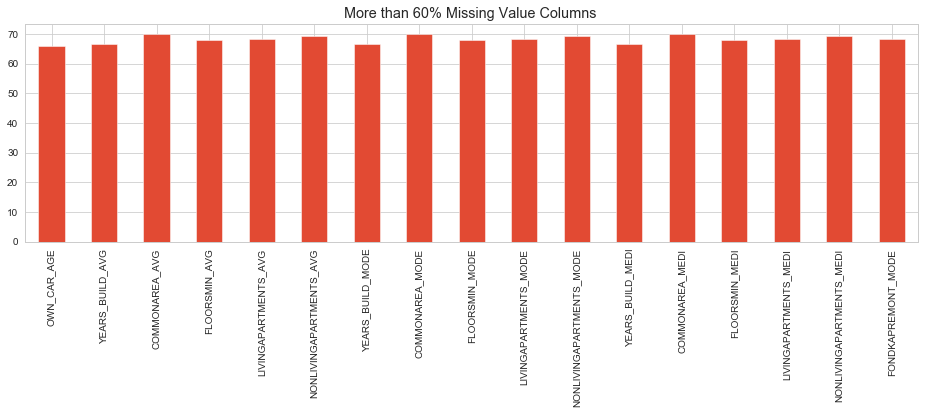

In [143]:
#plotting More than 60% Missing Value Columns
plt.figure(figsize=(16,4))
more60_perc_miss_cols.plot(kind='bar')
plt.title('More than 60% Missing Value Columns ')
plt.show()

<font color = 'Blue' size = 5 >**Inference** :</font>
<br> 
<br> 
<font color = 'Black' size = 3 >
 We can see Column wise % of Missing Value Range upto : ** 69.87**
</font>    
<br>
<br>
<br>

<font color =RedBlack size=5 >3.2.  __Removing columns__ with __High__ missing percentage </font>

In [154]:
#Function to remove Missing
def removeNulls(input_df, axis, percent):

    df = input_df.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df 

In [155]:
#Drop More than 60% percentage column's
drop_cols = removeNulls(app_data,1,0.6) 
drop_cols

Number of Columns dropped	:  17

Old dataset rows,columns (307511, 124) 
New dataset rows,columns (307511, 107)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.152418
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,4.954500,0.093737
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,9.127053,0.227174
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.250000,0.023820
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,9.063200,-18.172198
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.139540


In [156]:
#Drop More than 60% percentage column's
drop_rows = removeNulls(app_data,0,0.6) 
drop_rows


Number of Rows dropped	:  0

Old dataset rows,columns (307511, 124) 
New dataset rows,columns (307511, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.152418
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,4.954500,0.093737
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,9.127053,0.227174
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.250000,0.023820
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,9.063200,-18.172198
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.139540


<font color = 'Blue' size = 5 >**Inference** :</font>
<br> 
<br> 
<font color = 'Black' size = 3 >
 Removed Column wise > 60% of Missing Value & plot the same.
</font>    
<br>
<br>
<br>

<font color =GoldYellow size=5 >3.3.  __Filtering columns__ with __13__ percentage missing value</font>

In [21]:
#Less than 13% percentage column's
less13_perc_miss_cols = cols_miss_perc[ cols_miss_perc < 13]
less13_perc_miss_cols

AMT_ANNUITY                 0.00
AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
CNT_FAM_MEMBERS             0.00
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
DAYS_LAST_PHONE_CHANGE      0.00
dtype: float64

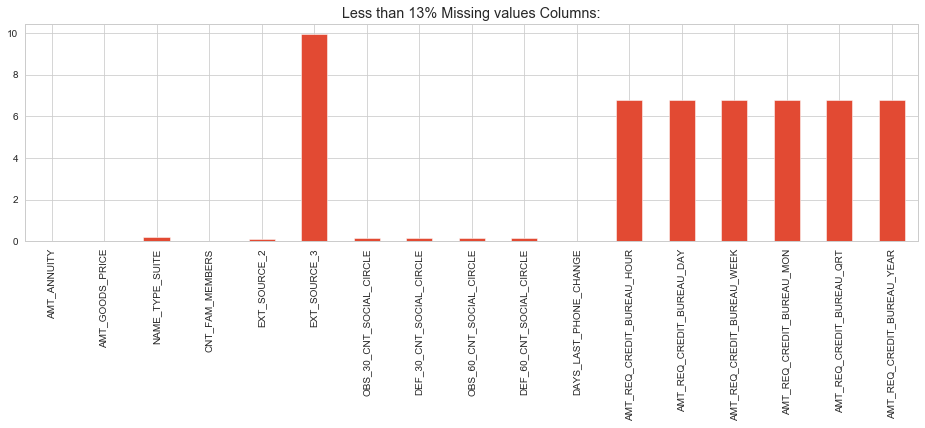

In [158]:
plt.figure(figsize=(16,4))
less13_perc_miss_cols.plot(kind='bar')
plt.title('Less than 13% Missing values Columns:')
plt.show()

- <font size= 5 color = Green> 3.3.1 Imputation based on datatypes </font>

> <font size= 3 color = VIOLET> FOR OBJECT TYPE -  NA / OTHERS / MODE  </font>

In [23]:
#OBJECT TYPE columns

#Filtering object type columns alone:
object_cols = app_data.loc[:, app_data.dtypes == np.object]
object_cols.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [24]:
#MODE IMPUTATION
#For Object type cols Imputing Mode 
for column in object_cols.columns:
    object_cols[column].fillna(object_cols[column].mode()[0], inplace=True)
    
object_cols.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel,No


In [25]:
#FLOAT TYPE columns

#Filtering float type columns alone:
float_cols = app_data.loc[:, app_data.dtypes == np.float64]
float_cols.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,NaN,1.0,0.083037,0.262949,0.139376,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,NaN,2.0,0.311267,0.622246,NaN,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,26.0,1.0,NaN,0.555912,0.729567,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,NaN,2.0,NaN,0.650442,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,NaN,1.0,NaN,0.322738,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#INT TYPE columns

#Filtering float type columns alone:
int_cols = app_data.loc[:, app_data.dtypes == np.int64]
int_cols.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-3648,-2120,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-1186,-291,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-4260,-2531,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-9833,-2437,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-4311,-3458,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#MEAN IMPUTATION
#For both INT/FLOAT type cols Imputing Mode 
for column in int_cols.columns:
    int_cols[column].fillna(int_cols[column].mode()[0], inplace=True)
    
int_cols.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-3648,-2120,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-1186,-291,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-4260,-2531,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-9833,-2437,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-4311,-3458,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#MEAN IMPUTATION
#For INT/FLOAT type cols Imputing Mode 
for column in float_cols.columns:
    float_cols[column].fillna(float_cols[column].mode()[0], inplace=True)
    
float_cols.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,7.0,1.0,0.083037,0.262949,0.139376,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,7.0,2.0,0.311267,0.622246,0.746300,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,26.0,1.0,0.356323,0.555912,0.729567,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,7.0,2.0,0.356323,0.650442,0.746300,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,7.0,1.0,0.356323,0.322738,0.746300,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color = 'Blue' size = 5 >*Inference* :</font>
<br> 
<font color = 'Black' size = 3 >
> for int or float we usually impute with mean unless there are outliers.
if there are outliers we prefer median to impute missing values
</font>

<font size = 5 color = Orange>3.4. Validation of column -DataType</font>

In [22]:
#Checking the columns to impute the corresponding columns with either mean/median/mode:
print(app_data.info(max_cols=122))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [9]:
#Convertion float -> Int

app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype('int64')
app_data['DAYS_REGISTRATION'].dtype

dtype('int64')

<font color = 'Blue' size = 5 >**Inference** :</font>
<br> 
<br> 
<font color = 'Black' size = 3 >
It’s clear that **DAYS_REGISTRATION** column should be **Integer format only not float.**
</font>    
<br>
<br>
<br>

<font size = 5 color = RED>3.5. Outliers in Previous Application Data File:</font>

In [163]:
#Checking the Outliers for 'AMT_GOODS_PRICE' column
amt_goods_price = prev_app_data[['AMT_GOODS_PRICE']]
desc_amt_goods_price = amt_goods_price.describe()
desc_amt_goods_price.round(2)

,AMT_GOODS_PRICE
count,1284699.00
mean,227847.28
std,315396.56
min,0.00
25%,50841.00
50%,112320.00
75%,234000.00
max,6905160.00


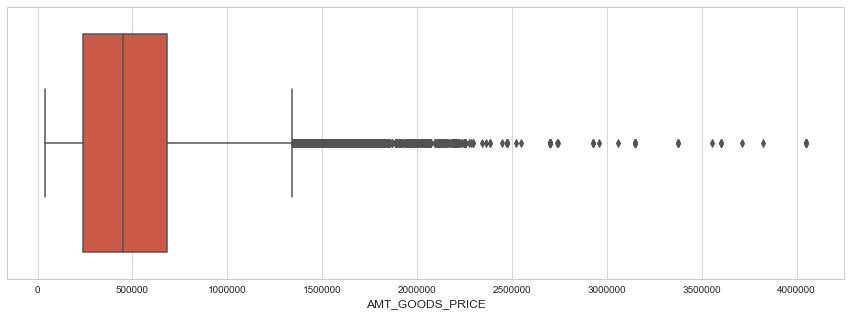

In [197]:
#AMT_GOODS_PRICE boxplot:
plt.figure(figsize=(15,5))
sns.boxplot(x=app_data['AMT_GOODS_PRICE'])

In [196]:
#Checking the Outliers for 'AMT_GOODS_PRICE' column
amt_goods_price = prev_app_data[['AMT_ANNUITY']]
desc_amt_goods_price = amt_goods_price.describe()
desc_amt_goods_price.round(2)

,AMT_ANNUITY
count,1297979.00
mean,15955.12
std,14782.14
min,0.00
25%,6321.78
50%,11250.00
75%,20658.42
max,418058.14


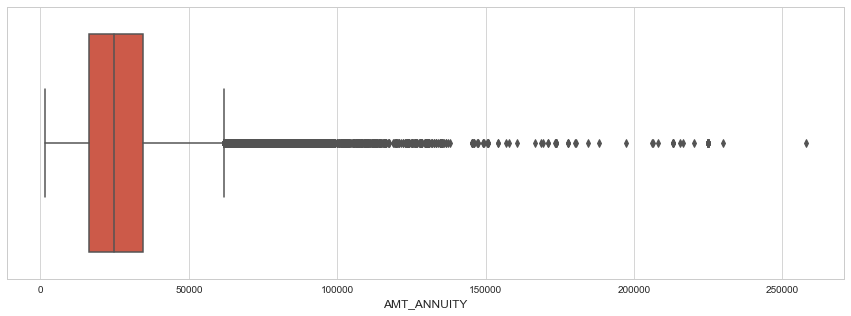

In [170]:
#AMT_ANUITY boxplot:
plt.figure(figsize=(15,5))
sns.boxplot(x=app_data['AMT_ANNUITY'])

In [206]:
q2 = prev_app_data["AMT_ANNUITY"].quantile(0.90)
loan = prev_app_data[prev_app_data["AMT_ANNUITY"] < q2]
prev_app_data["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [202]:
#Checking the Outliers for 'AMT_INCOME_TOTAL' column
amt_goods_price = app_data[['AMT_INCOME_TOTAL']]
desc_amt_goods_price = amt_goods_price.describe()
desc_amt_goods_price.round(2)

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


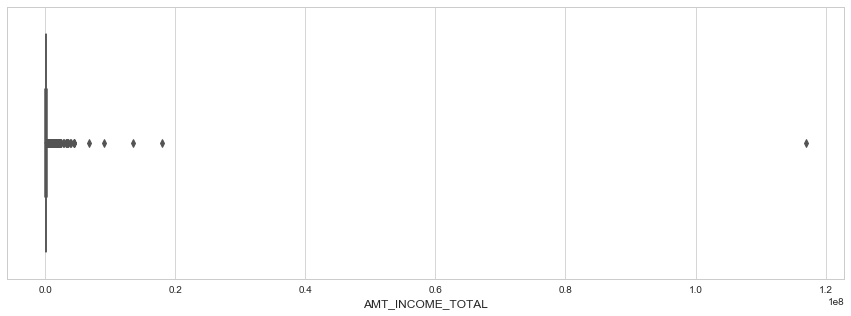

In [203]:
#Boxplot for 'AMT_INCOME_TOTAL'
plt.figure(figsize=(15,5))
sns.boxplot(x=app_data['AMT_INCOME_TOTAL'])

In [205]:
Q = app_data["AMT_INCOME_TOTAL"].quantile(0.99)
app_data = app_data[app_data["AMT_INCOME_TOTAL"] < Q]
app_data["AMT_INCOME_TOTAL"].describe()

count    304417.000000
mean     162911.014841
std       77494.004409
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [168]:
#Checking the Outliers for 'CNT_CHILDREN' column
child_cnt = app_data[['CNT_CHILDREN']]
desc_child_cnt = child_cnt.describe()
#amt_tot_income
desc_child_cnt.round(0)

,CNT_CHILDREN
count,307511.0
mean,0.0
std,1.0
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,19.0


Here the max "19" which is Outlier of CNT_CHILDREN variable. It means it is rare scenario to have 19 children.

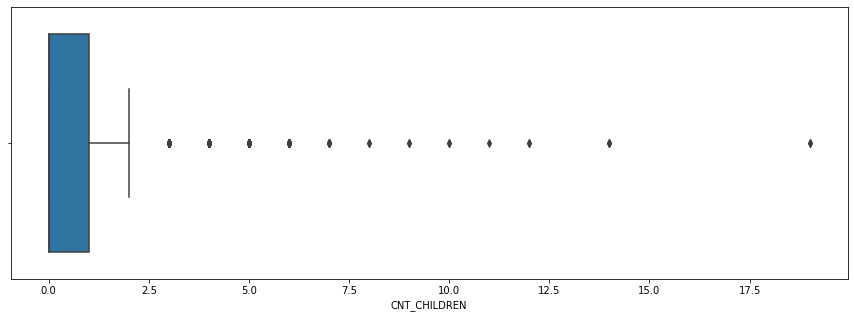

In [57]:
#Children count Box plot for Outlier:
plt.figure(figsize=(15,5))
sns.boxplot(x=app_data['CNT_CHILDREN'])

In [169]:
#Checking the Outliers for 'AMT_CREDIT' column
amt_crdt = app_data[['AMT_CREDIT']]
desc_amt_crdt = amt_crdt.describe()
desc_amt_crdt.round(0)

,AMT_CREDIT
count,307511.0
mean,599026.0
std,402491.0
min,45000.0
25%,270000.0
50%,513531.0
75%,808650.0
max,4050000.0


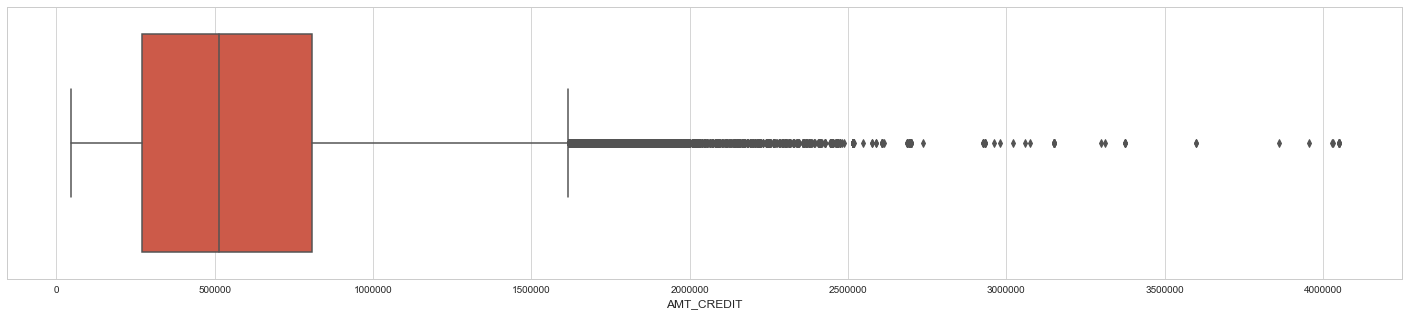

In [177]:
#'EXT_SOURCE_2'  Box plot for Outlier:
plt.figure(figsize=(25,5))
sns.boxplot(x=app_data['AMT_CREDIT'])

<font color = 'Blue' size = 5 > Inference :</font>
    
- **AMT_ANNUITY**: Here so many oultliers are there after 0.95 range so will remove the outlier present after 0.95 them from the column AMT_ANNUITY.we should Remove Outliers. 
<br>
<br>
- **CNT_CHILDREN**: Having more than 10 children are treated as outliers.One of the entry children are **19**.we should Remove Outliers. 
<br>
<br>
- **AMT_INCOME_TOTAL** Income ranges from 25k to 300k. As per above after 0.99 quantile value outliers are present so will remove the outliers from AMT_INCOME_TOTAL.Remove Outliers (values from 99 to 100%)

<br>
<br>

- **AMT_GOODS_PRICE** Here approximate price of goods that client asked is around  **234000.00** and top Outlier is  **6905160.00**. we should Remove Outliers 
<br>
<br>
- **AMT_CREDIT**: Here after 0.95 quantile value outliers are present so will remove the outliers from AMT_CREDIT.we should Remove Outliers (values from 95 to 100%)

## BINNIG DAYS_BIRTH COLUMN:

In [66]:
# Age information into a separate dataframe
age_data = app_data[['DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = round(age_data['DAYS_BIRTH'] / (-365) , None) 

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.tail(15)

,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
307496,-17345,48.0,"(45.0, 50.0]"
307497,-16679,46.0,"(45.0, 50.0]"
307498,-19102,52.0,"(50.0, 55.0]"
307499,-16988,47.0,"(45.0, 50.0]"
307500,-20390,56.0,"(55.0, 60.0]"
307501,-12961,36.0,"(35.0, 40.0]"
307502,-16063,44.0,"(40.0, 45.0]"
307503,-11870,33.0,"(30.0, 35.0]"
307504,-16705,46.0,"(45.0, 50.0]"
307505,-24384,67.0,"(65.0, 70.0]"


In [208]:
# Create Bins for range of AMT_CREDIT

bins = [0, 25000, 50000, 75000, 100000, 125000,150000, 175000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000','125000-150000','150000 and above']
bin_1= pd.cut(loan['AMT_CREDIT'], bins, labels=slot)


In [209]:
# Removed all NA values from AMT_GOODS_PRICE
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(), inplace=True)

Text(0.5, 0, 'AMT_CREDIT Distribution')

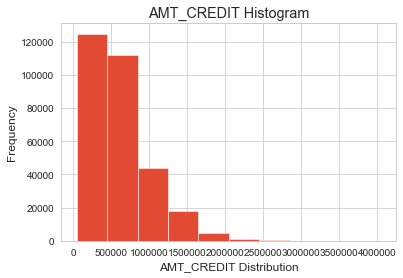

In [213]:
app_data['AMT_CREDIT'].plot.hist(title = 'AMT_CREDIT Histogram')
plt.xlabel('AMT_CREDIT Distribution')

In [210]:
# Create Bins for range of AMT_GOODS_PRICE

bins = [0, 25000, 50000, 75000, 100000, 125000,150000, 175000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000','125000-150000','150000 and above']
bin_2 = pd.cut(app_data['AMT_GOODS_PRICE'], bins, labels=slot)


Text(0.5, 0, 'AMT_GOODS_PRICE Distribution')

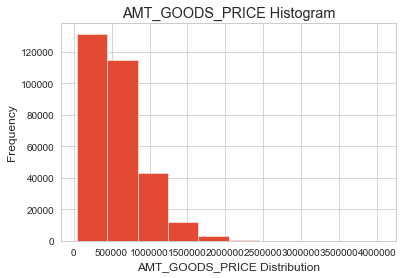

In [214]:
app_data['AMT_GOODS_PRICE'].plot.hist(title = 'AMT_GOODS_PRICE Histogram')
plt.xlabel('AMT_GOODS_PRICE Distribution')

We have seen till now in HIstogram how the distrubtion will be for AMT_GOODS_PRICE & AMT_CREDIT. Both plots are showing almost similar distribution.

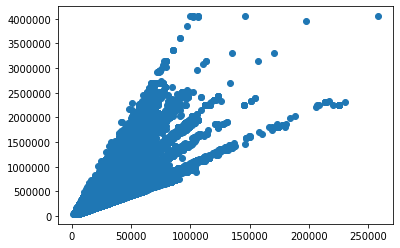

In [63]:
#Scatterplot for the AMT_ANNUITY & AMT_CREDIT
plt.scatter(app_data['AMT_ANNUITY'], app_data['AMT_CREDIT'])

 <br>
<br>
<br>
<br>
<br>

## 4.  <font color = GoldBlue size = 5> **ANALYSIS:** </font>


> 4.1.  <font size= 4 color = Red> DATA IMBALANCE:</font>

- <font size= 3 color = Violet>  This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other class.</font>

> Example: 
> Let's assume we have two classes:

> - A -> representing 99.99% of the population
> - B-> representing 0.01% of the population

- <font size= 3 color = Blue> Data Imbalance Percentage: </font>

In [10]:
#Target - 0 & Target - 1 percentage
target_count = app_data['TARGET'].value_counts()

target_total = target_count.sum()
target0 = (target_count[0]*100)/target_total
target1 = (target_count[1]*100)/target_total
print('Percentage of Target "0":',round(target0,2))
print('Percentage of Target "1":',round(target1,2))

Percentage of Target "0": 91.93
Percentage of Target "1": 8.07


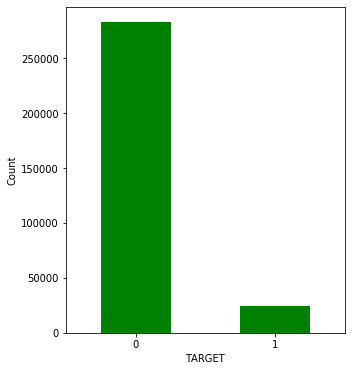

In [11]:
#Find out data imbalance for the Target feature
feature = "TARGET"
axis = app_data[feature].value_counts().plot(kind='bar',
                                    figsize=(5,6), 
                                    color='green')
axis.set_xlabel(feature)
plt.xticks(rotation=0)
axis.set_ylabel("Count")
plt.show()

<font color = 'Blue' size = 5 >**Inference** :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >
**It’s clear that our target feature distribution is highly imbalanced with 'Target-0' i.e, 91.93% which is more than 'Target-1' i.e, 8.07% .**
</font>    

<br>
<br>
<br>
<br>
<font color = 'Brown' size = 5 >4.2. SPLITTING DATA BASED ON "TARGET" :</font>
<br> 

In [12]:
# Splitting Target Data -1 into df_1 DataFrame,  Target-0 Dataset into df_0 DataFrame
df=[x for df_by_target,x in app_data.groupby('TARGET')]
df_0= df[0]
df_1 = df[1]
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
# Target-0 Dataset shape
df_0.shape

(282686, 122)

In [14]:
# Target-1 Dataset sample
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Target-1 Dataset shape
df_1.shape

(24825, 122)

We can use this Target-0 & Target-1 Datasets for further Analysis. 

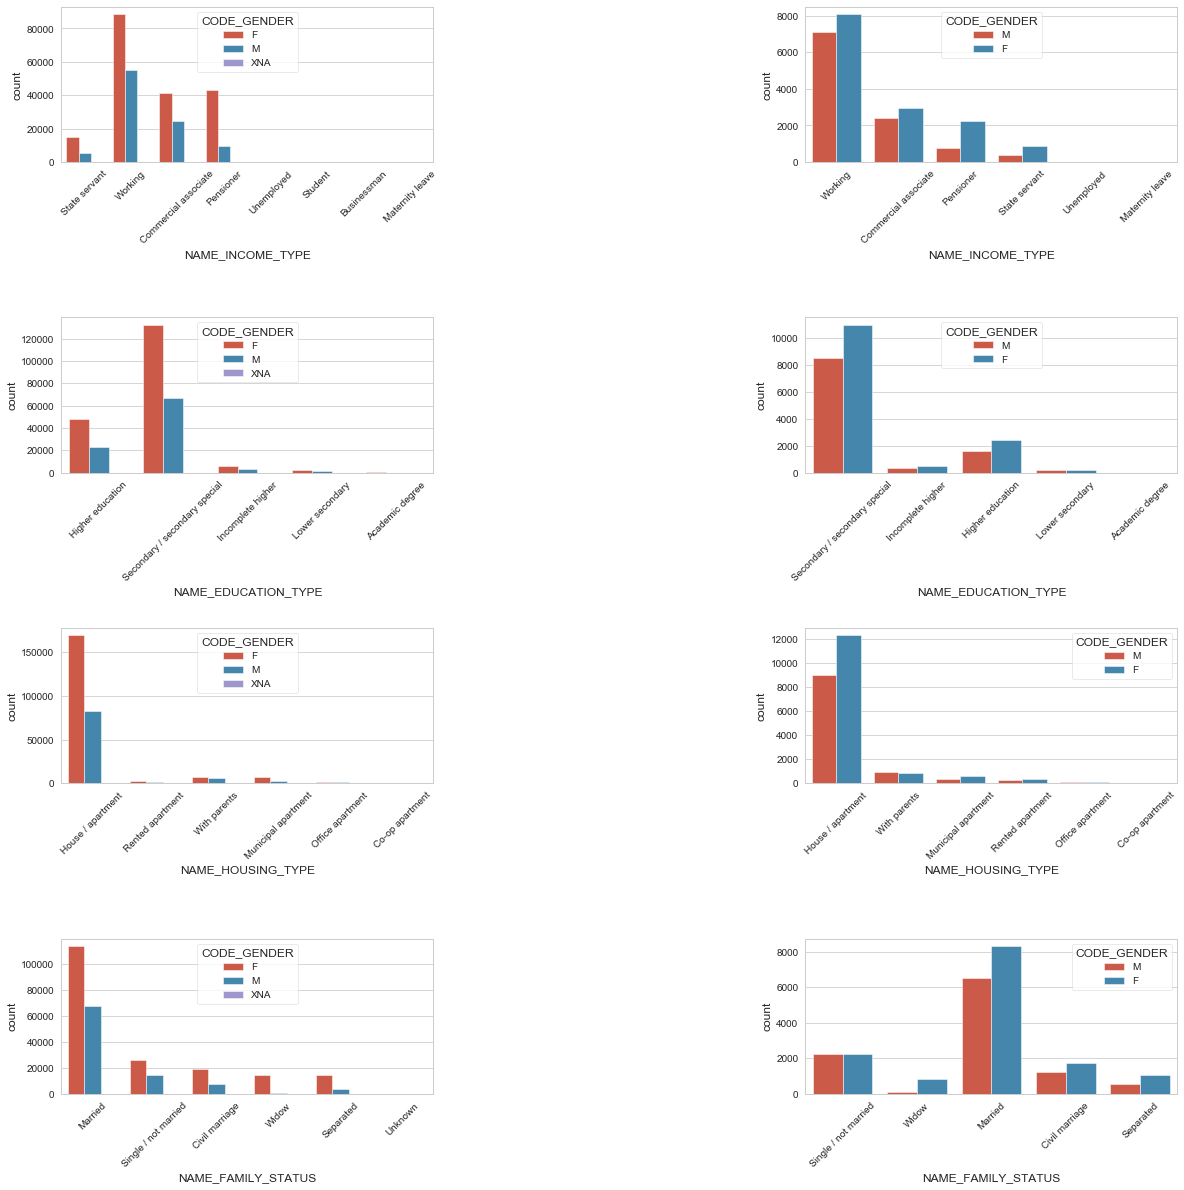

In [217]:
#Here we can compare for both df-0 & 1 with respect to CODE_GENDER
cols_analysis =  ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS']
i=1
fig, ax=plt.subplots(nrows = 4, ncols=2, figsize= (20,20))
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)
for col in cols_analysis:
    plt.subplot(4,2,i)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    sns.countplot(x= df_0[col], hue = "CODE_GENDER",data=df_0)
    plt.subplot(4,2,i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x=df_1[col], hue = 'CODE_GENDER',data=df_1)
    i+=2

In [227]:
DF0 = df_0[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',
           'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']]
DF0.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
1,100003,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,House / apartment,School,0.622246,NaN
2,100004,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,House / apartment,Government,0.555912,0.729567
3,100006,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,House / apartment,Business Entity Type 3,0.650442,NaN
4,100007,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,House / apartment,Religion,0.322738,NaN
5,100008,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,House / apartment,Other,0.354225,0.621226


In [228]:
# conituous variables where Traget value is 0
num = ['int64', 'float64']
newdf = DF0.select_dtypes(include = num)
newdf.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.622246,NaN
2,100004,67500.0,135000.0,6750.0,135000.0,0.555912,0.729567
3,100006,135000.0,312682.5,29686.5,297000.0,0.650442,NaN
4,100007,121500.0,513000.0,21865.5,513000.0,0.322738,NaN
5,100008,99000.0,490495.5,27517.5,454500.0,0.354225,0.621226


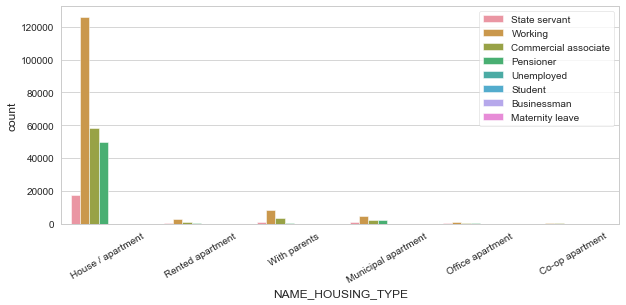

In [267]:
#Bivariate analaysis for target-0 , categorical-categorical variables 
plt.figure(figsize=(10,4))
sns.countplot(x = 'NAME_HOUSING_TYPE', hue ='NAME_INCOME_TYPE', data  = DF0)
plt.xticks(rotation = 30)
plt.legend(loc='upper right')

In [230]:
# correlation matrix for Target 0 
corr_mat = newdf.corr()
corr_mat

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.001589,0.000309
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.139598,-0.072401
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.129140,0.036085
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.126615,0.028051
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.135694,0.038908
EXT_SOURCE_2,0.001589,0.139598,0.129140,0.126615,0.135694,1.000000,0.084597
EXT_SOURCE_3,0.000309,-0.072401,0.036085,0.028051,0.038908,0.084597,1.000000


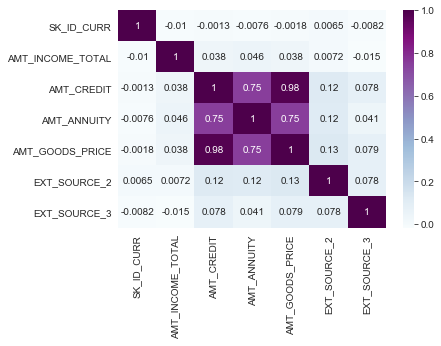

In [258]:
# Heatmap for numerical and continuous cloumns 

corr_mat = newdf.corr()
sns.heatmap(corr_mat,cmap ="BuPu", annot =True)

In [232]:
# Get a list of highly correlated variable
corr_mat = newdf.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k = 1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2','CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False).head(10)

,VAR1,VAR2,CORR
30,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
23,AMT_ANNUITY,AMT_CREDIT,0.771309
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
29,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
36,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.139598
39,EXT_SOURCE_2,AMT_GOODS_PRICE,0.135694
37,EXT_SOURCE_2,AMT_CREDIT,0.129140
38,EXT_SOURCE_2,AMT_ANNUITY,0.126615


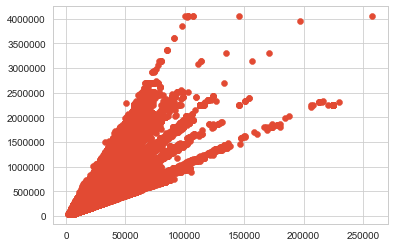

In [233]:
# Bi- variate analysis for continuous-continuous variables for target - 0
## ScatterPlot 
plt.scatter(newdf['AMT_ANNUITY'], newdf['AMT_CREDIT'])

<font color = 'Blue' size = 5 >Inference :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >
Here range is from 0 to 200K.
  <br>  
 It shows if AMT_ANNUITY increases then AMT_CREDIT also increasing and also it having outliers
</font>

In [237]:
# Creating new Dataframe from the df1 dataframe where Target value is 1.
df1=app_data.loc[app_data.TARGET==1]
DF1 = df1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',
           'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']]
DF1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,House / apartment,Business Entity Type 3,0.262949,0.139376
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,House / apartment,Business Entity Type 3,0.548477,0.190706
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,House / apartment,Business Entity Type 3,0.306841,0.320163
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,House / apartment,Self-employed,0.674203,0.399676
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,House / apartment,XNA,0.023952,0.720944


(array([0, 1]), <a list of 2 Text xticklabel objects>)

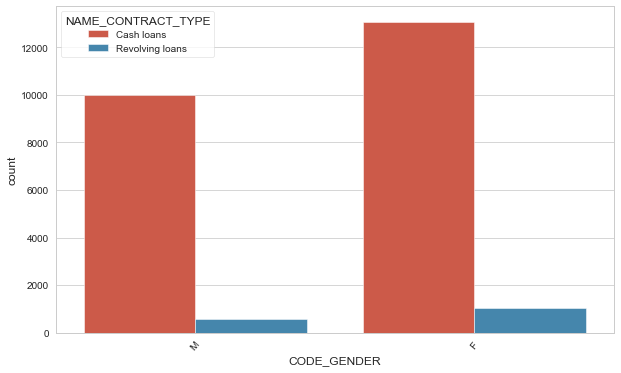

In [238]:
#Bivariate analaysis for target-1 categorical-categorical variables
plt.figure(figsize=(10,6))
sns.countplot(x = 'CODE_GENDER', hue ='NAME_CONTRACT_TYPE', data  = df1)
plt.xticks(rotation = 50)

<font color = 'Blue' size = 5 >*Inference* :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >
*When compared to the revolving loans cash loans are greater in percentages.*
</font>

In [239]:
# conituous variables where Traget value is 1 
DF1 = df_1[['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']]
num = ['int64', 'float64']
newdf = DF1.select_dtypes(include = num)
newdf.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,202500.0,406597.5,24700.5,351000.0,0.262949,0.139376
26,100031,112500.0,979992.0,27076.5,702000.0,0.548477,0.190706
40,100047,202500.0,1193580.0,35028.0,855000.0,0.306841,0.320163
42,100049,135000.0,288873.0,16258.5,238500.0,0.674203,0.399676
81,100096,81000.0,252000.0,14593.5,252000.0,0.023952,0.720944


In [240]:
# correlation matrix for Target 1
corr_mat = newdf.corr()
corr_mat

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,0.006452,-0.008178
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,0.007154,-0.015110
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.120848,0.077698
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.116305,0.041415
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.131184,0.078754
EXT_SOURCE_2,0.006452,0.007154,0.120848,0.116305,0.131184,1.000000,0.077760
EXT_SOURCE_3,-0.008178,-0.015110,0.077698,0.041415,0.078754,0.077760,1.000000


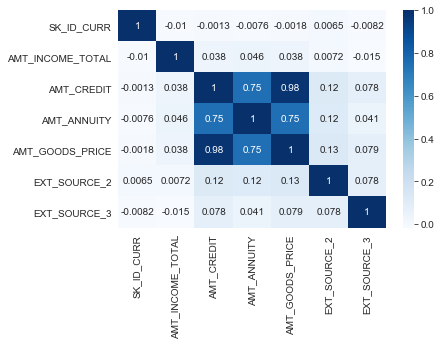

In [251]:
# Heatmap for numerical and contiunous cloumns 
sns.heatmap(corr_mat, cmap ="Blues", annot = True)
corr_mat = newdf.corr()

In [242]:
# Get a list of highly correalted columns for target - 1

corr_mat = newdf.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2','CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False).head(10)

,VAR1,VAR2,CORR
30,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
23,AMT_ANNUITY,AMT_CREDIT,0.752195
39,EXT_SOURCE_2,AMT_GOODS_PRICE,0.131184
37,EXT_SOURCE_2,AMT_CREDIT,0.120848
38,EXT_SOURCE_2,AMT_ANNUITY,0.116305
46,EXT_SOURCE_3,AMT_GOODS_PRICE,0.078754
47,EXT_SOURCE_3,EXT_SOURCE_2,0.077760
44,EXT_SOURCE_3,AMT_CREDIT,0.077698
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421


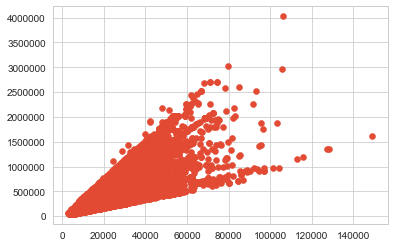

In [243]:
# Bi-variate analysis for continuous-continuous variables for target - 1
## ScatterPlot 
plt.scatter(newdf['AMT_ANNUITY'], newdf['AMT_CREDIT'])

<font color = 'Blue' size = 5 >Insight :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >
Most of values are ranging from 0 to 200k, it shows that AMT_ANNUITY increases with the increase of AMT_CREDIT .
</font>

## Joining DataSets

In [207]:
cur_app = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")
df3 = pd.merge(cur_app ,prev_app, on = 'SK_ID_CURR', how = 'inner')
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [68]:
#Subset info from the Joined Df:
df4 = df3[['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_YIELD_GROUP',
          'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','AMT_DOWN_PAYMENT','NAME_PORTFOLIO','TARGET','FLAG_OWN_REALTY','SK_ID_PREV',
           'CNT_CHILDREN','OCCUPATION_TYPE','REGION_RATING_CLIENT','ORGANIZATION_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_PAYMENT']]
df4.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_CONTRACT_TYPE_x,CODE_GENDER,NAME_YIELD_GROUP,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,AMT_DOWN_PAYMENT,...,TARGET,FLAG_OWN_REALTY,SK_ID_PREV,CNT_CHILDREN,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_PAYMENT
0,100002,202500.0,406597.5,24700.5,Cash loans,M,low_normal,Approved,New,0.0,...,1,Y,1038818,0,Laborers,2,Business Entity Type 3,Secondary / secondary special,Single / not married,24.0
1,100003,270000.0,1293502.5,35698.5,Cash loans,F,low_normal,Approved,Repeater,NaN,...,0,N,1810518,0,Core staff,1,School,Higher education,Married,12.0
2,100003,270000.0,1293502.5,35698.5,Cash loans,F,middle,Approved,Refreshed,0.0,...,0,N,2636178,0,Core staff,1,School,Higher education,Married,6.0
3,100003,270000.0,1293502.5,35698.5,Cash loans,F,middle,Approved,Refreshed,6885.0,...,0,N,2396755,0,Core staff,1,School,Higher education,Married,12.0
4,100004,67500.0,135000.0,6750.0,Revolving loans,M,middle,Approved,New,4860.0,...,0,Y,1564014,0,Laborers,2,Government,Secondary / secondary special,Single / not married,4.0


In [69]:
#Replacing XNA and XAP values with np.nan for better plotting

df4.replace(to_replace = 'XNA', value = np.nan, inplace = True) 
df4.replace(to_replace = 'XAP', value = np.nan, inplace = True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

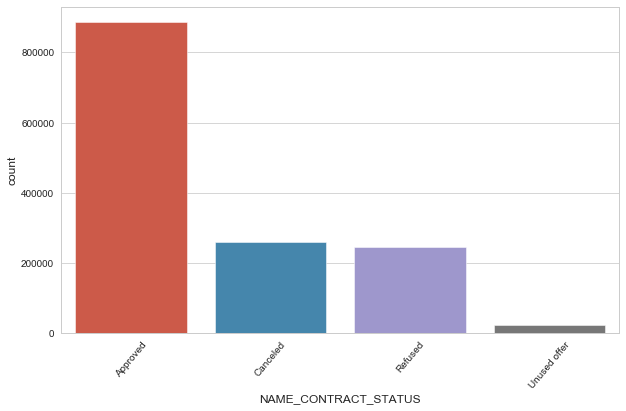

In [259]:
#Univariate Categirical variable NAME_CONTRACT_STATUS from previous Application file 

plt.figure(figsize=(10,6))
sns.countplot(x = 'NAME_CONTRACT_STATUS', data = DF4)
plt.xticks(rotation = 50)

<font color = 'Blue' size = 5 >Infrence </font>
<br> 
<br> 

<font color = 'Black' size = 3 >
From the plot we can see that around 85% of people's loan got accepted in previous application.
</font>

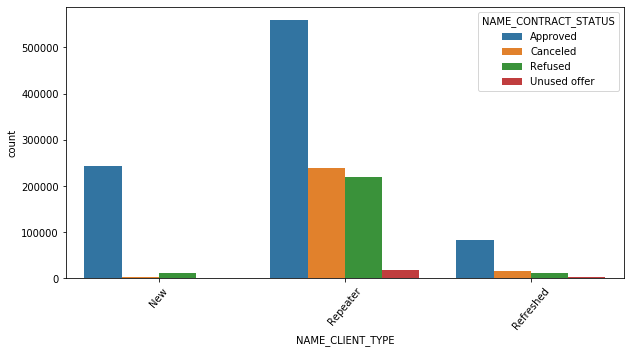

In [70]:
#Bivariate analaysis for categorical-categorical variables
plt.figure(figsize=(10,5))
sns.countplot(x = 'NAME_CLIENT_TYPE', hue ='NAME_CONTRACT_STATUS',data  = df4)
plt.xticks(rotation = 50)
plt.show()

<font color = 'Blue' size = 5 >Inference </font>
<br> 
<br> 

<font color = 'Black' size = 3 >
Here multiple times more number of customers applied the loans and approved 55% 
    <br>
Rejection of loans for repeater is around 22% 
    <br>
    cancelled loan for repeaters around 24%. 
<br>
    Again for new customers loans are approved around 25% for refreshed customers loans are approved below 10%
</font> 
    

(array([0, 1]), <a list of 2 Text xticklabel objects>)

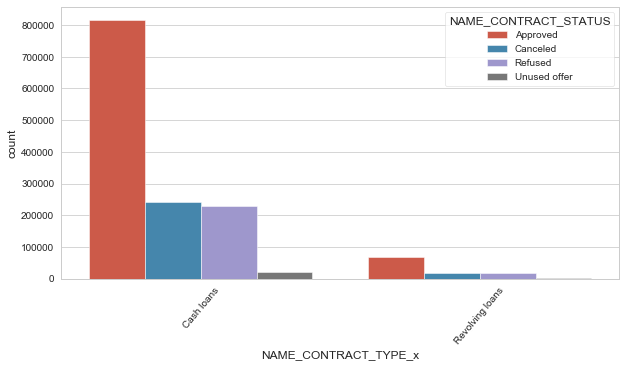

In [260]:
#Bivariate analaysis for categorical-categorical variables

plt.figure(figsize=(10,5))
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', hue ='NAME_CONTRACT_STATUS',data  = DF4)
plt.xticks(rotation = 50)

<font color = 'Blue' size = 5 >Inference :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >

Above plot indicates high number of cash loans are approved around 80% and refused and cancelled are around 25%
</font>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

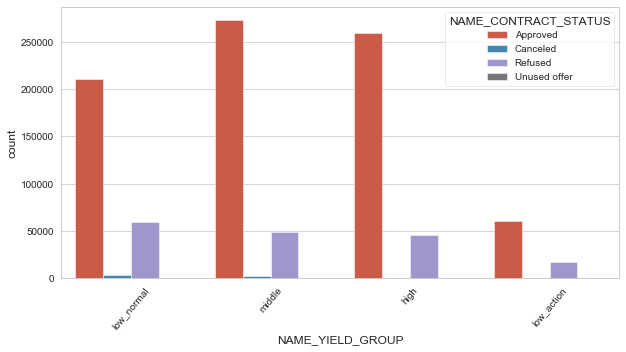

In [261]:
#Bivariate analaysis for categorical-categorical variables

plt.figure(figsize=(10,5))
sns.countplot(x = 'NAME_YIELD_GROUP', hue ='NAME_CONTRACT_STATUS',data  = DF4)
plt.xticks(rotation = 50)

<font color = 'Blue' size = 5 >Inference :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >

Loan is approved for more middle and high people around 28% 
<br>
rejection is high for low_action group people and moderate for low_normal people
</font>

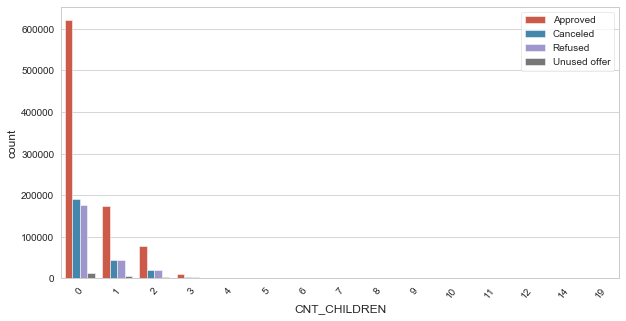

In [274]:
#Bivariate analaysis forcategorical-categorical variables
plt.figure(figsize=(10,5))
sns.countplot(x = 'CNT_CHILDREN', hue ='NAME_CONTRACT_STATUS',data  = DF4)
plt.xticks(rotation = 50)
plt.legend(loc='upper right')

<font color = 'Blue' size = 5 >Inference :</font>
<br> 
<br> 

<font color = 'Black' size = 3 >

Above plot indicates with less number kids parents applied for loan
</font>

In [ ]:
*********************************Analysis completed here ************************************************************

In [ ]:
**************************Sample Analysis Starts here ********************************

<font size = 5 color = Orange>Sampling DataSet:</font>

In [275]:
#Below Analysis is on both full or Sample data as well: 

In [76]:
#From the above we can derive that there is no such column/row where all are NA .
#I preformed these steps to remove the clutter.But we have a good data set.
#Eventhough we can skip above steps & directly do sampling as it is bigger data set.

app_file = 'application_data.csv'

no_of_lines = sum(1 for i in open(app_file))

size = int(no_of_lines // 2)

random.seed(7)

skip_id = random.sample(range(1,no_of_lines),size)

data = pd.read_csv(app_file, skiprows= skip_id)

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
2,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
3,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<font size = 5 color = Red>Missing value in columns:</font>

In [77]:
type(data)

pandas.core.frame.DataFrame

In [78]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        5
AMT_GOODS_PRICE                  126
NAME_TYPE_SUITE                  639
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   101396
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [79]:
missing_values=data.columns[data.isnull().any()]

In [80]:
missing_values

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [81]:
len(missing_values)

67

In [82]:
type(data)
data.shape

(153755, 122)

In [83]:
#Count of Missing values for those 67 columns in the sample dataset
data[missing_values].isnull().sum()

AMT_ANNUITY                          5
AMT_GOODS_PRICE                    126
NAME_TYPE_SUITE                    639
OWN_CAR_AGE                     101396
OCCUPATION_TYPE                  48309
CNT_FAM_MEMBERS                      1
EXT_SOURCE_1                     86950
EXT_SOURCE_2                       323
EXT_SOURCE_3                     30532
APARTMENTS_AVG                   77924
BASEMENTAREA_AVG                 90071
YEARS_BEGINEXPLUATATION_AVG      74934
YEARS_BUILD_AVG                 102328
COMMONAREA_AVG                  107487
ELEVATORS_AVG                    81797
ENTRANCES_AVG                    77308
FLOORSMAX_AVG                    76417
FLOORSMIN_AVG                   104434
LANDAREA_AVG                     91340
LIVINGAPARTMENTS_AVG            105162
LIVINGAREA_AVG                   77096
NONLIVINGAPARTMENTS_AVG         106847
NONLIVINGAREA_AVG                84731
APARTMENTS_MODE                  77924
BASEMENTAREA_MODE                90071
YEARS_BEGINEXPLUATATION_M

In [84]:
#First Calculate the Missing Values percentage for columns which are applcable:
cols_miss_perc_nonrounded = data.columns[data.isna().any()]
cols_miss_perc = round(data[cols_miss_perc_nonrounded].isnull().sum()*100/app_data.shape[0],2)

In [85]:
cols_miss_perc

AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.04
NAME_TYPE_SUITE                  0.21
OWN_CAR_AGE                     32.97
OCCUPATION_TYPE                 15.71
CNT_FAM_MEMBERS                  0.00
EXT_SOURCE_1                    28.28
EXT_SOURCE_2                     0.11
EXT_SOURCE_3                     9.93
APARTMENTS_AVG                  25.34
BASEMENTAREA_AVG                29.29
YEARS_BEGINEXPLUATATION_AVG     24.37
YEARS_BUILD_AVG                 33.28
COMMONAREA_AVG                  34.95
ELEVATORS_AVG                   26.60
ENTRANCES_AVG                   25.14
FLOORSMAX_AVG                   24.85
FLOORSMIN_AVG                   33.96
LANDAREA_AVG                    29.70
LIVINGAPARTMENTS_AVG            34.20
LIVINGAREA_AVG                  25.07
NONLIVINGAPARTMENTS_AVG         34.75
NONLIVINGAREA_AVG               27.55
APARTMENTS_MODE                 25.34
BASEMENTAREA_MODE               29.29
YEARS_BEGINEXPLUATATION_MODE    24.37
YEARS_BUILD_

In [86]:
# cols_miss_more_60_perc = cols_miss_perc[ cols_miss_perc > 60]
# cols_miss_more_60_perc
#drop_more_60_perc = cols_miss_more_60_perc.tolist()
#type(drop_more_60_perc) 
#new_data = app_data.drop(, axis = 1, inplace = True)
#new_data
#app_data.columns(drop_more_60_perc)

In [87]:
#Less than 13% percentage column's
less13_perc_miss_cols = cols_miss_perc[ cols_miss_perc < 13]
less13_perc_miss_cols

AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.04
NAME_TYPE_SUITE               0.21
CNT_FAM_MEMBERS               0.00
EXT_SOURCE_2                  0.11
EXT_SOURCE_3                  9.93
OBS_30_CNT_SOCIAL_CIRCLE      0.17
DEF_30_CNT_SOCIAL_CIRCLE      0.17
OBS_60_CNT_SOCIAL_CIRCLE      0.17
DEF_60_CNT_SOCIAL_CIRCLE      0.17
DAYS_LAST_PHONE_CHANGE        0.00
AMT_REQ_CREDIT_BUREAU_HOUR    6.77
AMT_REQ_CREDIT_BUREAU_DAY     6.77
AMT_REQ_CREDIT_BUREAU_WEEK    6.77
AMT_REQ_CREDIT_BUREAU_MON     6.77
AMT_REQ_CREDIT_BUREAU_QRT     6.77
AMT_REQ_CREDIT_BUREAU_YEAR    6.77
dtype: float64

In [88]:
less13_perc_miss_cols.shape

(17,)

In [89]:
#Drop these columns from sample dataframe
drop_more_13_perc_miss_cols = cols_miss_perc[ cols_miss_perc < 13]
drop_more_13_perc_miss_cols

AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.04
NAME_TYPE_SUITE               0.21
CNT_FAM_MEMBERS               0.00
EXT_SOURCE_2                  0.11
EXT_SOURCE_3                  9.93
OBS_30_CNT_SOCIAL_CIRCLE      0.17
DEF_30_CNT_SOCIAL_CIRCLE      0.17
OBS_60_CNT_SOCIAL_CIRCLE      0.17
DEF_60_CNT_SOCIAL_CIRCLE      0.17
DAYS_LAST_PHONE_CHANGE        0.00
AMT_REQ_CREDIT_BUREAU_HOUR    6.77
AMT_REQ_CREDIT_BUREAU_DAY     6.77
AMT_REQ_CREDIT_BUREAU_WEEK    6.77
AMT_REQ_CREDIT_BUREAU_MON     6.77
AMT_REQ_CREDIT_BUREAU_QRT     6.77
AMT_REQ_CREDIT_BUREAU_YEAR    6.77
dtype: float64

In [90]:
# drop_m13_list = drop_more_13_perc_miss_cols.tolist()
# drop_df = data[drop_m13_list]
# drop_df


ddf = pd.DataFrame(drop_more_13_perc_miss_cols)
dt = ddf.T
drop_cols = dt.columns
drop_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [91]:
final_df = data.drop(drop_cols, axis = 1)
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,Commercial associate,...,0,0,1,0,0,0,0,0,0,0
3,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,State servant,...,0,0,0,0,0,0,0,0,0,0
4,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#Required Df from both the application & Prev_application Data:
req_df = app_data[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','OCCUPATION_TYPE','CNT_FAM_MEMBERS']]
req_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,Laborers,1.0
1,100003,0,Cash loans,F,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,Core staff,2.0
2,100004,0,Revolving loans,M,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,Laborers,1.0
3,100006,0,Cash loans,F,N,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,Laborers,2.0
4,100007,0,Cash loans,M,N,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,Core staff,1.0
5,100008,0,Cash loans,M,N,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,Laborers,2.0
6,100009,0,Cash loans,F,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213,Accountants,3.0
7,100010,0,Cash loans,M,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-18850,-449,-4597,Managers,2.0
8,100011,0,Cash loans,F,N,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427,NaN,2.0
9,100012,0,Revolving loans,M,N,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437,Laborers,1.0


In [93]:
resulting_df= final_df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','OCCUPATION_TYPE']]
resulting_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE
0,100006,0,Cash loans,F,N,0,135000.000,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers
1,100008,0,Cash loans,M,N,0,99000.000,490495.5,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970.0,Laborers
2,100009,0,Cash loans,F,Y,1,171000.000,1560726.0,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213.0,Accountants
3,100010,0,Cash loans,M,Y,0,360000.000,1530000.0,State servant,Higher education,Married,House / apartment,-18850,-449,-4597.0,Managers
4,100012,0,Revolving loans,M,N,0,135000.000,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437.0,Laborers
5,100014,0,Cash loans,F,N,1,112500.000,652500.0,Working,Higher education,Married,House / apartment,-10197,-679,-4427.0,Core staff
6,100015,0,Cash loans,F,N,0,38419.155,148365.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,NaN
7,100016,0,Cash loans,F,N,0,67500.000,80865.0,Working,Secondary / secondary special,Married,House / apartment,-13439,-2717,-311.0,Laborers
8,100017,0,Cash loans,M,Y,1,225000.000,918468.0,Working,Secondary / secondary special,Married,House / apartment,-14086,-3028,-643.0,Drivers
9,100018,0,Cash loans,F,N,0,189000.000,773680.5,Working,Secondary / secondary special,Married,House / apartment,-14583,-203,-615.0,Laborers


In [94]:
miss_values=resulting_df.columns[resulting_df.isnull().any()]
miss_values

Index(['OCCUPATION_TYPE'], dtype='object')

<font size = 5 color = Orange>Validation of column -DataType</font>

In [95]:
#Describing the datatypes of resulting df:
resulting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 16 columns):
SK_ID_CURR             153755 non-null int64
TARGET                 153755 non-null int64
NAME_CONTRACT_TYPE     153755 non-null object
CODE_GENDER            153755 non-null object
FLAG_OWN_CAR           153755 non-null object
CNT_CHILDREN           153755 non-null int64
AMT_INCOME_TOTAL       153755 non-null float64
AMT_CREDIT             153755 non-null float64
NAME_INCOME_TYPE       153755 non-null object
NAME_EDUCATION_TYPE    153755 non-null object
NAME_FAMILY_STATUS     153755 non-null object
NAME_HOUSING_TYPE      153755 non-null object
DAYS_BIRTH             153755 non-null int64
DAYS_EMPLOYED          153755 non-null int64
DAYS_REGISTRATION      153755 non-null float64
OCCUPATION_TYPE        105446 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 18.8+ MB


In [96]:
#Checking the datatypes of missing values alone to impute the corresponding columns with mean/mode:
resulting_df[miss_values].dtypes

OCCUPATION_TYPE    object
dtype: object

In [97]:
#Filtering object type columns alone:
object_cols = resulting_df[miss_values].loc[:, resulting_df[miss_values].dtypes == np.object]
object_cols.head()

,OCCUPATION_TYPE
0,Laborers
1,Laborers
2,Accountants
3,Managers
4,Laborers


In [98]:
#MODE IMPUTATION
#For Object type cols Imputing Mode 
for column in resulting_df.columns:
    resulting_df[column].fillna(resulting_df[column].mode()[0], inplace=True)
    
resulting_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE
0,100006,0,Cash loans,F,N,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers
1,100008,0,Cash loans,M,N,0,99000.0,490495.5,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970.0,Laborers
2,100009,0,Cash loans,F,Y,1,171000.0,1560726.0,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213.0,Accountants
3,100010,0,Cash loans,M,Y,0,360000.0,1530000.0,State servant,Higher education,Married,House / apartment,-18850,-449,-4597.0,Managers
4,100012,0,Revolving loans,M,N,0,135000.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437.0,Laborers


In [99]:
resulting_df.info()                                                                                                                                                                                                                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 16 columns):
SK_ID_CURR             153755 non-null int64
TARGET                 153755 non-null int64
NAME_CONTRACT_TYPE     153755 non-null object
CODE_GENDER            153755 non-null object
FLAG_OWN_CAR           153755 non-null object
CNT_CHILDREN           153755 non-null int64
AMT_INCOME_TOTAL       153755 non-null float64
AMT_CREDIT             153755 non-null float64
NAME_INCOME_TYPE       153755 non-null object
NAME_EDUCATION_TYPE    153755 non-null object
NAME_FAMILY_STATUS     153755 non-null object
NAME_HOUSING_TYPE      153755 non-null object
DAYS_BIRTH             153755 non-null int64
DAYS_EMPLOYED          153755 non-null int64
DAYS_REGISTRATION      153755 non-null float64
OCCUPATION_TYPE        153755 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 18.8+ MB


In [100]:
resulting_df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
DAYS_REGISTRATION      0
OCCUPATION_TYPE        0
dtype: int64

In [101]:
#Converting column of 'Days registration' from float -> Int

resulting_df['DAYS_REGISTRATION'] = resulting_df['DAYS_REGISTRATION'].astype('int64')
resulting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 16 columns):
SK_ID_CURR             153755 non-null int64
TARGET                 153755 non-null int64
NAME_CONTRACT_TYPE     153755 non-null object
CODE_GENDER            153755 non-null object
FLAG_OWN_CAR           153755 non-null object
CNT_CHILDREN           153755 non-null int64
AMT_INCOME_TOTAL       153755 non-null float64
AMT_CREDIT             153755 non-null float64
NAME_INCOME_TYPE       153755 non-null object
NAME_EDUCATION_TYPE    153755 non-null object
NAME_FAMILY_STATUS     153755 non-null object
NAME_HOUSING_TYPE      153755 non-null object
DAYS_BIRTH             153755 non-null int64
DAYS_EMPLOYED          153755 non-null int64
DAYS_REGISTRATION      153755 non-null int64
OCCUPATION_TYPE        153755 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 18.8+ MB


In [102]:
df = resulting_df
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE
0,100006,0,Cash loans,F,N,0,135000.000,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,Laborers
1,100008,0,Cash loans,M,N,0,99000.000,490495.5,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,Laborers
2,100009,0,Cash loans,F,Y,1,171000.000,1560726.0,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213,Accountants
3,100010,0,Cash loans,M,Y,0,360000.000,1530000.0,State servant,Higher education,Married,House / apartment,-18850,-449,-4597,Managers
4,100012,0,Revolving loans,M,N,0,135000.000,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437,Laborers
5,100014,0,Cash loans,F,N,1,112500.000,652500.0,Working,Higher education,Married,House / apartment,-10197,-679,-4427,Core staff
6,100015,0,Cash loans,F,N,0,38419.155,148365.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246,Laborers
7,100016,0,Cash loans,F,N,0,67500.000,80865.0,Working,Secondary / secondary special,Married,House / apartment,-13439,-2717,-311,Laborers
8,100017,0,Cash loans,M,Y,1,225000.000,918468.0,Working,Secondary / secondary special,Married,House / apartment,-14086,-3028,-643,Drivers
9,100018,0,Cash loans,F,N,0,189000.000,773680.5,Working,Secondary / secondary special,Married,House / apartment,-14583,-203,-615,Laborers


In [103]:
#.rename(columns = {'test':'TEST'}, inplace = True) 
#= df.rename({'a': 'X', 'b': 'Y'}, axis=1)
renamed_df= df.rename({'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'REGISTRATED_DURATION'}, axis = 1)
                                                         
renamed_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,REGISTRATED_DURATION,OCCUPATION_TYPE
0,100006,0,Cash loans,F,N,0,135000.000,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,Laborers
1,100008,0,Cash loans,M,N,0,99000.000,490495.5,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,Laborers
2,100009,0,Cash loans,F,Y,1,171000.000,1560726.0,Commercial associate,Higher education,Married,House / apartment,-13778,-3130,-1213,Accountants
3,100010,0,Cash loans,M,Y,0,360000.000,1530000.0,State servant,Higher education,Married,House / apartment,-18850,-449,-4597,Managers
4,100012,0,Revolving loans,M,N,0,135000.000,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437,Laborers
5,100014,0,Cash loans,F,N,1,112500.000,652500.0,Working,Higher education,Married,House / apartment,-10197,-679,-4427,Core staff
6,100015,0,Cash loans,F,N,0,38419.155,148365.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246,Laborers
7,100016,0,Cash loans,F,N,0,67500.000,80865.0,Working,Secondary / secondary special,Married,House / apartment,-13439,-2717,-311,Laborers
8,100017,0,Cash loans,M,Y,1,225000.000,918468.0,Working,Secondary / secondary special,Married,House / apartment,-14086,-3028,-643,Drivers
9,100018,0,Cash loans,F,N,0,189000.000,773680.5,Working,Secondary / secondary special,Married,House / apartment,-14583,-203,-615,Laborers


In [104]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 16 columns):
SK_ID_CURR              153755 non-null int64
TARGET                  153755 non-null int64
NAME_CONTRACT_TYPE      153755 non-null object
CODE_GENDER             153755 non-null object
FLAG_OWN_CAR            153755 non-null object
CNT_CHILDREN            153755 non-null int64
AMT_INCOME_TOTAL        153755 non-null float64
AMT_CREDIT              153755 non-null float64
NAME_INCOME_TYPE        153755 non-null object
NAME_EDUCATION_TYPE     153755 non-null object
NAME_FAMILY_STATUS      153755 non-null object
NAME_HOUSING_TYPE       153755 non-null object
AGE                     153755 non-null int64
YEARS_EMPLOYED          153755 non-null int64
REGISTRATED_DURATION    153755 non-null int64
OCCUPATION_TYPE         153755 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 18.8+ MB


In [105]:
renamed_df['AGE'] =  renamed_df['AGE'].astype('int64')

renamed_df['YEARS_EMPLOYED'] =  renamed_df['YEARS_EMPLOYED'].astype('int64')

renamed_df['REGISTRATED_DURATION'] =  renamed_df['REGISTRATED_DURATION'].astype('int64')

# gapminder[gapminder['year']==2002]

In [106]:
renamed_df = renamed_df.ix[renamed_df['YEARS_EMPLOYED'] > 0]

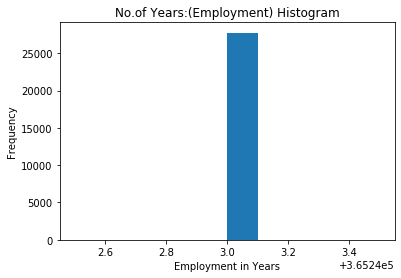

In [107]:
renamed_df['YEARS_EMPLOYED'].plot.hist(title = 'No.of Years:(Employment) Histogram');
plt.xlabel('Employment in Years');

In [108]:
renamed_df['YEARS_EMPLOYED'].describe()

count     27746.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: YEARS_EMPLOYED, dtype: float64

In [109]:
#Finding out Anomalies for 38 Years 
anom = renamed_df[renamed_df['YEARS_EMPLOYED'] == '38']
non_anom = renamed_df[renamed_df['YEARS_EMPLOYED'] != '38']
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 5.45% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1aa9d489b0>,
      dtype=object)

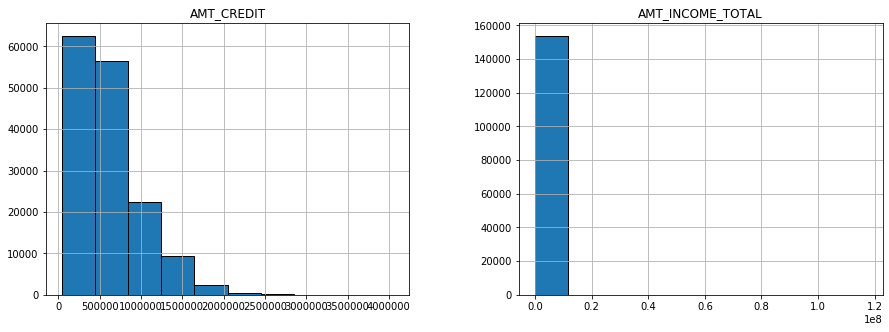

In [110]:
# AMT_CREDIT & AMT_INCOME_TOTAL
features = ['AMT_CREDIT','AMT_INCOME_TOTAL']
df[features].hist(figsize = (15,5),edgecolor = 'k')

## ** <font color = 'Brown' size = 6> Correlations </font>**

In [111]:
#CORRELATION MATRIX between columns:

corr_matrix = df.corr()
corr_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
SK_ID_CURR,1.000000,-0.005880,-0.001232,-0.001944,0.002905,-0.000721,-0.000297,-0.002201
TARGET,-0.005880,1.000000,0.019080,0.000456,-0.031686,0.078339,-0.045285,0.041816
CNT_CHILDREN,-0.001232,0.019080,1.000000,0.010678,0.002915,0.330657,-0.240028,0.182814
AMT_INCOME_TOTAL,-0.001944,0.000456,0.010678,1.000000,0.115918,0.021129,-0.048411,0.020301
AMT_CREDIT,0.002905,-0.031686,0.002915,0.115918,1.000000,-0.054050,-0.066372,0.009752
DAYS_BIRTH,-0.000721,0.078339,0.330657,0.021129,-0.054050,1.000000,-0.616337,0.330291
DAYS_EMPLOYED,-0.000297,-0.045285,-0.240028,-0.048411,-0.066372,-0.616337,1.000000,-0.210943
DAYS_REGISTRATION,-0.002201,0.041816,0.182814,0.020301,0.009752,0.330291,-0.210943,1.000000


- <font color = 'Blue' size = 5> Top - 3 & Bottom - 3 vs Target:</font>

In [112]:
corr_trgt = df.corr()['TARGET'].sort_values()
corr_trgt

# Display correlations
print('Most Positive Correlations:\n', corr_trgt.tail(3))
print('\nMost Negative Correlations:\n', corr_trgt.head(3))

Most Positive Correlations:
 DAYS_REGISTRATION    0.041816
DAYS_BIRTH           0.078339
TARGET               1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 DAYS_EMPLOYED   -0.045285
AMT_CREDIT      -0.031686
SK_ID_CURR      -0.005880
Name: TARGET, dtype: float64


- <font color = 'Orange' size = 5> Age vs Target:</font>

From the correlation matrix we can get this value as : "-0.078339"

Text(0, 0.5, 'Count')

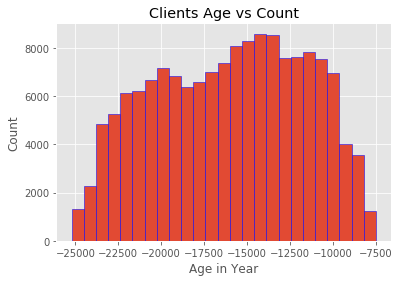

In [113]:

# setting a style to use 
plt.style.use('ggplot') 

plt.hist(df['DAYS_BIRTH'],edgecolor = 'b',bins = 25)
plt.title('Clients Age vs Count')
plt.xlabel('Age in Year')
plt.ylabel('Count')

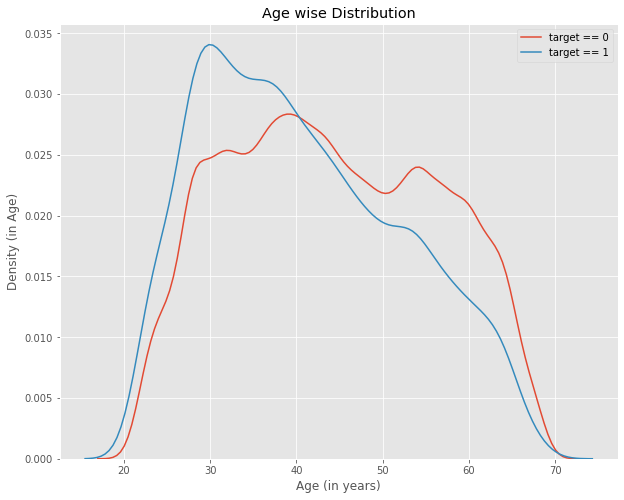

In [114]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (in years)'); plt.ylabel('Density (in Age)'); plt.title('Age wise Distribution');

In [115]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.tail(15)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
153740,0,-11973,32.802740,"(30.0, 35.0]"
153741,0,-23125,63.356164,"(60.0, 65.0]"
153742,0,-10092,27.649315,"(25.0, 30.0]"
153743,0,-20965,57.438356,"(55.0, 60.0]"
153744,0,-17533,48.035616,"(45.0, 50.0]"
153745,0,-14958,40.980822,"(40.0, 45.0]"
153746,0,-16679,45.695890,"(45.0, 50.0]"
153747,0,-19102,52.334247,"(50.0, 55.0]"
153748,0,-16988,46.542466,"(45.0, 50.0]"
153749,0,-16063,44.008219,"(40.0, 45.0]"


In [116]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.126254,-8535.212040,23.384143
"(25.0, 30.0]",0.113447,-10159.593425,27.834503
"(30.0, 35.0]",0.103060,-11861.372112,32.496910
"(35.0, 40.0]",0.088753,-13706.980485,37.553371
"(40.0, 45.0]",0.079472,-15497.105416,42.457823
"(45.0, 50.0]",0.074423,-17324.161004,47.463455
"(50.0, 55.0]",0.068932,-19201.551799,52.606991
"(55.0, 60.0]",0.055750,-20984.803974,57.492614
"(60.0, 65.0]",0.053800,-22782.013927,62.416477


Text(0.5, 1.0, 'Failure to Repay by Age Group')

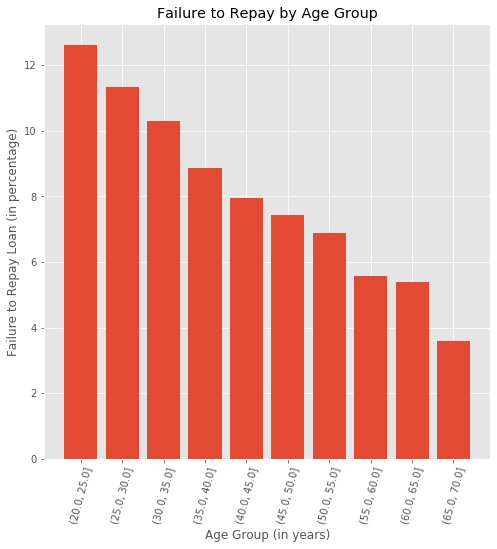

In [117]:
plt.figure(figsize = (8, 8))

# Graph a Bar plot using the age bins and the avg target.
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot the Graph
plt.xticks(rotation = 75)
plt.xlabel('Age Group (in years)')
plt.ylabel('Failure to Repay Loan (in percentage)')
plt.title('Failure to Repay by Age Group')

In [118]:
# Extract the most Negative correlation variables and compare the same:
ext_data = df[['TARGET','DAYS_EMPLOYED','AMT_CREDIT', 'SK_ID_CURR']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

# DAYS_BIRTH          -0.078339
# DAYS_REGISTRATION   -0.041816
# AMT_CREDIT          -0.031686
# SK_ID_CURR          -0.005880

,TARGET,DAYS_EMPLOYED,AMT_CREDIT,SK_ID_CURR
TARGET,1.000000,-0.045285,-0.031686,-0.005880
DAYS_EMPLOYED,-0.045285,1.000000,-0.066372,-0.000297
AMT_CREDIT,-0.031686,-0.066372,1.000000,0.002905
SK_ID_CURR,-0.005880,-0.000297,0.002905,1.000000


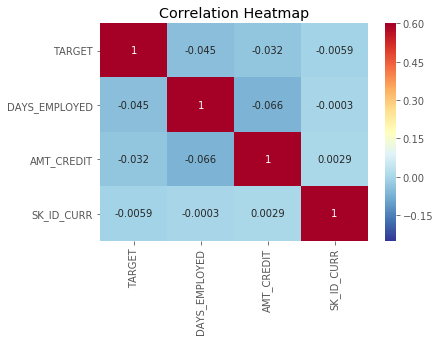

In [119]:

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [127]:
app_data['CREDIT_INCOME_PERCENT'] = app_data['AMT_CREDIT'] / app_data['AMT_INCOME_TOTAL']

In [132]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.152418


In [128]:
prev_app_data['CREDIT_TERM'] = prev_app_data['AMT_ANNUITY'] / prev_app_data['AMT_CREDIT']


In [133]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT_TERM
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.100929
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0.037060
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0.110380
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0.099920
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,0.079010


**<font color = 'RED' size = 5> Insights from these correlations:** </font>

<br>
<br>
<font color = 'GREEN'>
- Clients who have more Age ('DAYS_BIRTH') less likely to defauly the loan.  
<br>    
- Clients who have less Income ('AMT_INCOME_TOTAL has more') likely to defauly the loan.
</font>    

In [129]:
df['TARGET'].value_counts()

0    141227
1     12528
Name: TARGET, dtype: int64

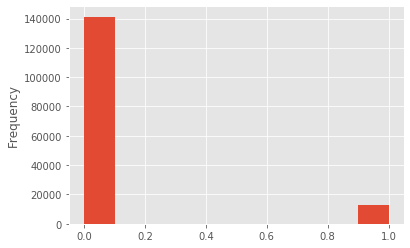

In [130]:
df['TARGET'].astype(int).plot.hist();

Text(0.5, 0, 'Days Employment')

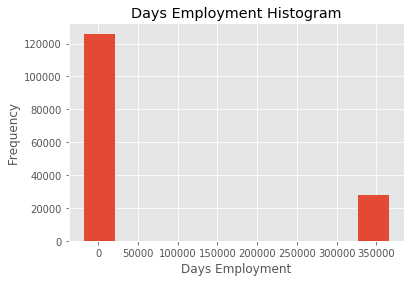

In [131]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')